<a href="https://colab.research.google.com/github/BelfinJoy89/Image-Video/blob/master/IV_Hog_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [0]:
data = pd.read_csv('/content/input.csv')
data.head()

,emotion (label),pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,0,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,0,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,0,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
data['Usage'].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [0]:
data['emotion (label)'].value_counts()

0    26898
1     8989
Name: emotion (label), dtype: int64

In [0]:
data['emotion (label)'].unique()
print(data.shape)

(35887, 3)


In [0]:
train = data[data['Usage'] == 'Training']
test = data[data['Usage'] != 'Training']
print(train.shape)
print(test.shape)

(28709, 3)
(7178, 3)


In [0]:
train_samples = list(train['pixels'].values)
test_samples = list(test['pixels'].values)

In [0]:
def hog_ft_extract(samples):
  ppc = 8
  images = []
  hog_features = []
  hog_images = []
  for i in range(len(samples)):
    image = np.fromstring(samples[i],dtype = int,sep = " ").reshape(48,48)
    images.append(image)
    ft,hog_image = hog(image,orientations = 9, pixels_per_cell = (ppc,ppc),cells_per_block = (1,1),block_norm = 'L2',
                  visualise = True)
    hog_images.append(hog_image)
    hog_features.append(ft)
  return(hog_images,hog_features,images)

In [0]:
train_hog_images,train_hog_ft,train_images = hog_ft_extract(train_samples)
test_hog_images,test_hog_ft,test_images = hog_ft_extract(test_samples)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


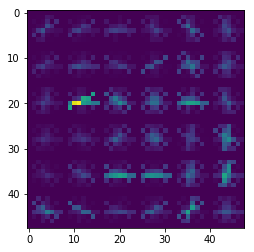

In [0]:
plt.imshow(train_hog_images[100])

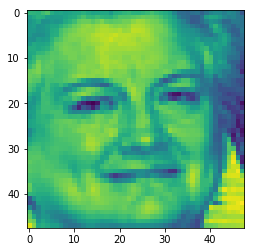

In [0]:
plt.imshow(train_images[100])

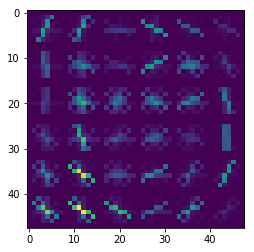

In [0]:
plt.imshow(test_hog_images[5])

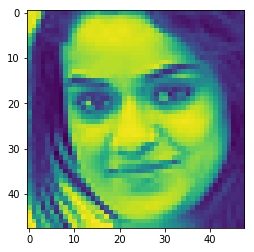

In [0]:
plt.imshow(test_images[5])

In [0]:
train_labels =  np.array(train['emotion (label)']).reshape(len(train['emotion (label)']),1)
print(train_labels.shape)
test_labels = np.array(test['emotion (label)']).reshape(len(test['emotion (label)']),1)
print(test_labels.shape)

(28709, 1)
(7178, 1)


In [0]:
clf = svm.LinearSVC(max_iter = 10000)
train_hog_features = np.array(train_hog_ft)
test_hog_features = np.array(test_hog_ft)
train_df = np.hstack((train_hog_features,train_labels))
test_df = np.hstack((test_hog_features,test_labels))
#np.random.shuffle(data_frame)

In [0]:
#x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
#y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

clf.fit(train_hog_features,train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred = clf.predict(test_hog_features)

In [0]:
print("Accuracy: ",(accuracy_score(test_labels, y_pred)))
print('\n')
print(classification_report(test_labels, y_pred))

Accuracy:  0.8246029534689329


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      5404
           1       0.72      0.48      0.58      1774

    accuracy                           0.82      7178
   macro avg       0.78      0.71      0.73      7178
weighted avg       0.81      0.82      0.81      7178



In [0]:
Evaluation = classification_report(test_labels, y_pred,output_dict = True)
eval_df = pd.DataFrame(Evaluation).transpose()
eval_df = eval_df.to_string()
output_file = open('Evaluation Metrics.txt','a')
output_file.write(eval_df)
output_file.close()

In [0]:
pred_list = []
for i in range(0,len(test_hog_features)):
  pred_data = y_pred[i],i
  pred_list.append(pred_data)
  

In [0]:
np.savetxt('Training Set.csv',train_hog_features)
np.savetxt('Testing Set.csv',test_hog_features)

In [0]:
pred_list[5]

(1, 5)

In [0]:
import csv
with open("Test Predictions.csv","w")  as f:
    writer=csv.writer(f, delimiter=",", lineterminator="\r\n") 
    writer.writerows(pred_list)
f.close()

In [0]:
from google.colab import files
files.download('Training Set.csv')
#files.download('Testing Set.csv')
#files.download('Evaluation Metrics.txt')
#files.download('Test Predictions.csv')